# Code for Predicting Lung Cancer Survived 

## Step 1: Import libraries

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Step 2: Data Preparation

In [41]:
data=pd.read_csv('Lung Cancer.csv')
print(data.head(5))

   id   age  gender      country diagnosis_date cancer_stage family_history  \
0   1  64.0    Male       Sweden     2016-04-05      Stage I            Yes   
1   2  50.0  Female  Netherlands     2023-04-20    Stage III            Yes   
2   3  65.0  Female      Hungary     2023-04-05    Stage III            Yes   
3   4  51.0  Female      Belgium     2016-02-05      Stage I             No   
4   5  37.0    Male   Luxembourg     2023-11-29      Stage I             No   

   smoking_status   bmi  cholesterol_level  hypertension  asthma  cirrhosis  \
0  Passive Smoker  29.4                199             0       0          1   
1  Passive Smoker  41.2                280             1       1          0   
2   Former Smoker  44.0                268             1       1          0   
3  Passive Smoker  43.0                241             1       1          0   
4  Passive Smoker  19.7                178             0       0          0   

   other_cancer treatment_type end_treatment_date 

## Step-3: For Finding any missing Data 

In [45]:
df=data.isnull().sum()
print(df)

id                    0
age                   0
gender                0
country               0
diagnosis_date        0
cancer_stage          0
family_history        0
smoking_status        0
bmi                   0
cholesterol_level     0
hypertension          0
asthma                0
cirrhosis             0
other_cancer          0
treatment_type        0
end_treatment_date    0
survived              0
dtype: int64


## Step 4: Encode

In [48]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])
data['cancer_stage'] = le.fit_transform(data['cancer_stage'])
data['family_history'] = le.fit_transform(data['family_history'])
data['smoking_status'] = le.fit_transform(data['smoking_status'])

## Step 5: Define Features and Target

In [51]:
X = data[['age','gender','cancer_stage','family_history','smoking_status','bmi','cholesterol_level','hypertension','asthma','cirrhosis']]
y = data['survived']

print(X.head(7))
print(y.head(7))

    age  gender  cancer_stage  family_history  smoking_status   bmi  \
0  64.0       1             0               1               3  29.4   
1  50.0       0             2               1               3  41.2   
2  65.0       0             2               1               1  44.0   
3  51.0       0             0               0               3  43.0   
4  37.0       1             0               0               3  19.7   
5  50.0       1             0               0               2  37.6   
6  49.0       0             2               1               3  43.1   

   cholesterol_level  hypertension  asthma  cirrhosis  
0                199             0       0          1  
1                280             1       1          0  
2                268             1       1          0  
3                241             1       1          0  
4                178             0       0          0  
5                274             1       0          0  
6                259             0     

##  Step 6: Split Data into Train and Test Sets

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

## Step 7: Train a Logistic Regression Model

In [57]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\Ayesha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Step 8: Make Predictions and Evaluate

In [60]:
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7803033707865169
Confusion Matrix:
 [[69447     0]
 [19553     0]]


## Step 9: Predict on New Patient Data

In [63]:
new_patient = [[55,0,2,1,1,30.1,200,0,1,0]] 
prediction = model.predict(new_patient)

if prediction[0] == 1:
    print("The patient will be survived.")
else:
    print("The patient will not survived.")

The patient will not survived.


C:\Users\Ayesha\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## Step 10:  Feature 

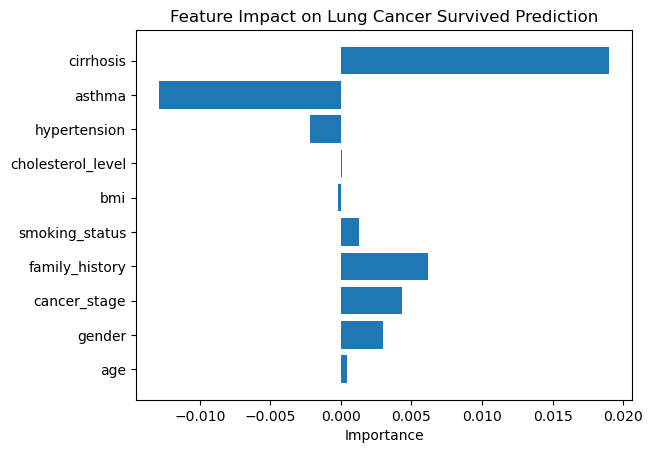

In [66]:
import matplotlib.pyplot as plt

coefficients = model.coef_[0]
features = X.columns

plt.barh(features, coefficients)
plt.xlabel("Importance")
plt.title("Feature Impact on Lung Cancer Survived Prediction")
plt.show()